# Laboratorio 1 – Machine Learning  
## Predicción del Riesgo Cardiovascular – AlpesHearth  

### Integrantes:
1. Juan Sebastian Rodriguez Torres - 202214617 - js.rodriguezt1@uniandes.edu.co
2. Luis Felipe Sales Galviz - 202211531 - l.sales@uniandes.edu.co

En este archivo se desarrollan los modelo de regresión lineal solicitados para estimar el "CVD Risk Score" de una persona a partir de las variables clínicas dadas. Las enfermedades cardiovasculares representan una de las principales causas de mortalidad a nivel mundial. AlpesHearth busca identificar tempranamente factores de riesgo en población joven con el fin de diseñar prevenciones.


## 1. Carga de datos

En esta sección se cargan los conjuntos de datos de entrenamiento, para comprender el significado de cada variable.
Con esto verificamos la estructura del dataset, las dimensiones, los tipos de variables y los datos en general antes de que empecemos a explorar y corregir.

In [24]:
%pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.formula.api import ols

from statsmodels.stats.diagnostic import linear_rainbow
from scipy.stats import ttest_1samp
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro


"""
from importlib.metadata import version
print(f"Versión de Pandas: {version('pandas')}")
print(f"Versión de Matplotlib: {version('matplotlib')}")
print(f"Versión de Scikit-learn: {version('scikit-learn')}")
print(f"Versión de Seaborn: {version('seaborn')}") """

df_real = pd.read_csv("./data/Datos Lab 1.csv")
df = df_real
print("Columnas y primeros 8 datos del dataframe (para observar correcta carga):\n")
df.head(9)


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Columnas y primeros 8 datos del dataframe (para observar correcta carga):




[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\jsrt3\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.000,114.300,1.720,38.600,100.000,112/83,228.0,...,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.000,92.923,1.842,33.116,106.315,101/91,158.0,...,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,...,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW
3,dCDO1109,"April 18, 2022",F,35.000,113.300,1.780,35.800,79.600,92/89,158.0,...,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,01/11/2024,F,48.000,102.200,1.750,33.400,106.700,121/68,207.0,...,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
5,MQyB2747,25 Mar 24,M,43.000,52.700,1.850,15.400,107.700,107/61,105.0,...,High,N,185.000,0.582,107.0,61.0,Normal,43.0,10.530,INTERMEDIARY
6,DHdn8968,22 May 25,F,31.000,87.000,1.660,31.600,91.500,139/81,207.0,...,Low,Y,166.000,0.551,139.0,81.0,Hypertension Stage 1,121.0,17.410,HIGH
7,vkQL9700,"October 26, 2023",M,69.000,59.684,1.940,23.914,117.986,106/115,206.0,...,High,Y,193.981,0.608,106.0,115.0,Hypertension Stage 2,134.0,16.203,HIGH
8,bUBT9994,15/12/2023,F,89.162,85.600,1.660,31.100,83.600,103/99,222.0,...,High,N,166.000,0.504,103.0,99.0,Hypertension Stage 2,126.0,NaN,HIGH


## 2. Exploración y perfilamiento de datos

Aqui vamos a que permite identificar posibles problemas y transformaciones necesarias para poder seguir con el modelado.

- Ver el tamaño y los tipos de datos
- Analizar valores nulos
- Identificar registros duplicados
- Estadisticas numéricas
- Verificar correlaciones entre variables
- Identificar de valores atipicos


## Completitud de datos

In [10]:
print("\n◉ PORCENTAJE DE VALORES NULOS:\n")
print((df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False))

print("\n\n◉ INFORMACION DEL DATAFRAME:\n")
df.info()


◉ PORCENTAJE DE VALORES NULOS:

Diastolic BP                    5.186089
HDL (mg/dL)                     5.003051
Waist-to-Height Ratio           4.636974
Weight (kg)                     4.453935
Total Cholesterol (mg/dL)       4.148871
Age                             4.148871
Height (cm)                     4.148871
Height (m)                      3.721782
Abdominal Circumference (cm)    3.721782
Systolic BP                     3.721782
Estimated LDL (mg/dL)           3.477730
Fasting Blood Sugar (mg/dL)     3.294692
BMI                             3.233679
CVD Risk Score                  1.769372
Sex                             0.000000
Patient ID                      0.000000
Date of Service                 0.000000
Family History of CVD           0.000000
Diabetes Status                 0.000000
Smoking Status                  0.000000
Blood Pressure (mmHg)           0.000000
Physical Activity Level         0.000000
Blood Pressure Category         0.000000
CVD Risk Level          

In [48]:
print("\n\n◉ DESCRIPCIÓN ESTADÍSTICA (VARIABLES NUMÉRICAS):\n")
df.describe()



◉ DESCRIPCIÓN ESTADÍSTICA (VARIABLES NUMÉRICAS):



,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
count,1571.000000,1566.000000,1578.000000,1586.000000,1578.000000,1571.000000,1557.000000,1585.000000,1571.000000,1563.000000,1578.000000,1554.000000,1582.000000,1610.000000
mean,46.803186,85.666006,1.757439,28.424744,91.538861,199.043673,56.183558,117.836860,175.770082,0.522440,125.632637,82.887536,113.235896,18.227281
std,13.039479,21.712504,0.118012,7.309275,13.427985,59.388670,16.721702,32.379634,11.695880,0.085692,22.577463,15.503625,61.435291,10.767666
min,6.134000,13.261000,1.371000,4.317000,49.542000,-1.256000,0.008000,15.306000,136.498000,0.250000,49.914000,31.720000,-92.055000,-20.057000
25%,37.000000,67.100000,1.666500,22.600000,79.700000,150.000000,42.000000,92.000000,167.000000,0.453000,108.000000,71.000000,62.000000,15.150000
50%,46.000000,86.314000,1.760000,28.000000,91.200000,199.000000,56.000000,115.000000,176.000000,0.519000,125.000000,82.000000,112.000000,16.967000
75%,55.000000,104.801500,1.850000,33.963000,102.267250,250.000000,70.000000,139.000000,185.000000,0.582000,141.000000,93.000000,159.000000,18.900000
max,89.420000,158.523000,2.146000,53.028000,136.336000,385.679000,110.315000,219.667000,214.394000,0.804000,202.711000,134.066000,317.314000,114.980000




◉ HEATMAP PARA VER CORRELACIÓN ENTRE VARIABLES:



<Axes: >

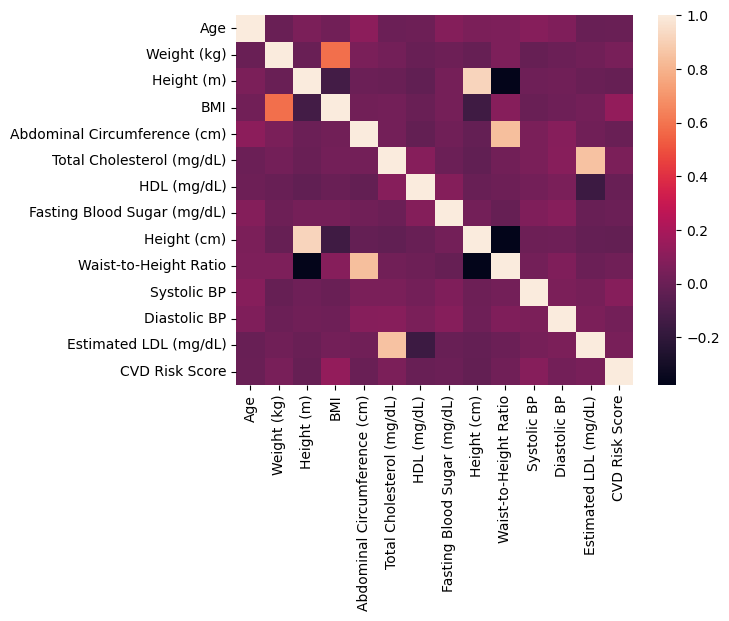

In [43]:
print("\n\n◉ HEATMAP PARA VER CORRELACIÓN ENTRE VARIABLES:\n")
sns.heatmap(df.corr(numeric_only=True))

## Unicidad de datos

In [15]:
print("\n\n◉ Podemos verificar si hay filas duplicadas en el dataset:\n")
df.duplicated(keep  = False).sum()
df[df.duplicated(keep = False)]

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
10,oSqq7069,18 Jun 23,F,38.0,68.516,1.929,39.967,96.957,105/84,241.000,...,Moderate,Y,192.936,0.503,105.0,84.0,Hypertension Stage 1,159.0,18.063,HIGH
14,gBFe4249,04/02/2020,F,52.0,89.700,1.880,25.400,107.500,145/92,142.000,...,Low,Y,188.000,0.572,145.0,92.0,Hypertension Stage 2,42.0,17.170,HIGH
17,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.900,139/61,253.000,...,Low,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH
29,RlsB8509,29/08/2020,F,55.0,79.700,1.780,25.200,86.900,140/62,248.000,...,Moderate,Y,178.000,0.488,140.0,62.0,Hypertension Stage 2,182.0,19.000,HIGH
31,RwGu5647,"May 03, 2020",M,42.0,51.095,1.521,20.190,72.274,159/91,296.000,...,Moderate,N,152.080,0.259,159.0,91.0,Hypertension Stage 2,211.0,17.908,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,KiRC8867,20/12/2024,M,46.0,90.748,1.705,30.866,108.768,105/113,198.000,...,Moderate,N,170.518,0.638,105.0,113.0,Hypertension Stage 2,117.0,15.383,INTERMEDIARY
1614,XUjh9519,2022-08-15,F,55.0,73.500,1.880,20.800,82.700,144/72,21.662,...,Low,Y,188.000,0.440,144.0,72.0,Hypertension Stage 2,100.0,16.680,HIGH
1624,rZFB5714,05 Sep 21,M,NaN,55.600,1.830,16.600,104.800,126/95,289.000,...,High,N,183.000,0.573,126.0,95.0,Hypertension Stage 2,201.0,15.400,INTERMEDIARY
1633,gBFe4249,04/02/2020,F,52.0,89.700,1.880,25.400,107.500,145/92,142.000,...,Low,Y,188.000,0.572,145.0,92.0,Hypertension Stage 2,42.0,17.170,HIGH


In [19]:
print("\n\n◉ Podemos verificar si hay más de un registro con el mismo ID de paciente\n")
dup_counts = (df[["Patient ID"]].groupby("Patient ID").size().reset_index(name="Count").sort_values(by="Count", ascending=False))
dup_counts = dup_counts[dup_counts["Count"] > 1]
for id_, n in dup_counts[["Patient ID", "Count"]].values:
    print(f"Id={id_} -> {n} registros")
size = dup_counts.shape[0]
print("En total hay ", size)



◉ Podemos verificar si hay más de un registro con el mismo ID de paciente

Id=HNpy8362 -> 3 registros
Id=zZle5455 -> 3 registros
Id=QJtE0701 -> 3 registros
Id=HNwp6592 -> 3 registros
Id=zhZi8857 -> 3 registros
Id=THSJ8564 -> 3 registros
Id=RlsB8509 -> 3 registros
Id=DxSq2036 -> 3 registros
Id=ZoSr4813 -> 3 registros
Id=KQUs0708 -> 3 registros
Id=HVVR3121 -> 3 registros
Id=aKVE8560 -> 3 registros
Id=cUUw7860 -> 3 registros
Id=RwGu5647 -> 3 registros
Id=KXhc1181 -> 3 registros
Id=dJuC5084 -> 3 registros
Id=dNyM1057 -> 3 registros
Id=dSiv4949 -> 3 registros
Id=Kbzi4901 -> 3 registros
Id=eAaf2477 -> 3 registros
Id=gBFe4249 -> 3 registros
Id=Xvbe7861 -> 3 registros
Id=Keaq9838 -> 3 registros
Id=ePpS4710 -> 3 registros
Id=TPHC2670 -> 3 registros
Id=fHqx3420 -> 3 registros
Id=gXxm9399 -> 3 registros
Id=gdBF9655 -> 3 registros
Id=BQvQ6431 -> 3 registros
Id=EsZI4603 -> 3 registros
Id=KiRC8867 -> 3 registros
Id=gynJ3543 -> 3 registros
Id=inTX4760 -> 3 registros
Id=ivTX4645 -> 3 registros
Id=sI

Podemos ver que existen muchos ids de pacientes que se repiten, lo que indica que hay registros duplicados. Esto puede ser un problema para el modelado, ya que puede sesgar los resultados y hacer que el modelo aprenda patrones incorrectos. Vamos a profundizar como puede cambiar cada registro

In [20]:
dup_table = (
    df[df["Patient ID"].duplicated(keep=False)]
    .copy()
    .assign(repeticiones=df.groupby("Patient ID")["Patient ID"].transform("size"))
    .sort_values(["repeticiones", "Patient ID"], ascending=[False, True])
    
)
dup_table

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level,repeticiones
17,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,...,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH,3
1227,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,...,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,-13.090,HIGH,3
1584,AhYt1346,09-28-2020,M,41.0,71.300,1.730,23.800,107.9,139/61,253.0,...,Y,173.000,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.770,HIGH,3
130,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.1,116/93,171.0,...,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,17.500,LOW,3
1469,BQvQ6431,09/11/2020,M,33.0,118.300,1.690,41.400,72.1,116/93,171.0,...,N,210.554,0.427,116.0,93.0,Hypertension Stage 2,97.0,29.833,LOW,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,yvsn3005,28 Oct 20,F,60.0,54.300,1.810,16.600,99.1,133/65,187.0,...,N,181.000,0.548,133.0,65.0,Hypertension Stage 1,79.0,15.710,INTERMEDIARY,2
95,zcgB3048,12/06/2020,M,38.0,60.436,1.506,20.269,79.7,168/63,119.0,...,N,150.616,0.529,168.0,63.0,Hypertension Stage 2,43.0,14.834,HIGH,2
375,zcgB3048,12/06/2020,M,38.0,60.436,1.506,20.269,79.7,168/63,119.0,...,N,150.616,0.529,168.0,63.0,Hypertension Stage 2,43.0,14.834,HIGH,2
799,zxhX5525,"November 13, 2021",M,26.0,58.953,1.688,25.286,NaN,110/114,258.0,...,Y,168.763,0.455,110.0,114.0,Hypertension Stage 2,170.0,15.717,HIGH,2


Podemos ver unos de los Ids de pacientes duplicados para ver que podemos hacer con estos datos.

In [21]:
df[df["Patient ID"] == "AhYt1346"]

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
17,AhYt1346,09-28-2020,M,41.0,71.3,1.73,23.8,107.9,139/61,253.0,...,Low,Y,173.0,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.77,HIGH
1227,AhYt1346,09-28-2020,M,41.0,71.3,1.73,23.8,107.9,139/61,253.0,...,Low,Y,173.0,NaN,139.0,NaN,Hypertension Stage 1,146.0,-13.09,HIGH
1584,AhYt1346,09-28-2020,M,41.0,71.3,1.73,23.8,107.9,139/61,253.0,...,Low,Y,173.0,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.77,HIGH


## 3. Limpieza y preparación de datos

Con base en los hallazgos del análisis anterior vamos a modificar los datos para luego proceder al modelado.

Notamos que la columna "Height" está tecnicamente repetida, hay una para CM y otra para M. Al ser los mismos datos decidimos eliminar por completo una de las columnas, además no tienen una correlación fuerte con ninguna otra variable por lo que es seguro hacerlo.

Se encontraron 150 registros dulpicados exactamente iguales, si fueran pacientes distintos con los mismos datos el id sería diferente y no habria un duplicado, ademas si los registros son exactamente iguales podemos asumir que es un dato duplicado porque la fecha en la que se hizo al revisión seria la misma.

Decidimos tambien cambiar las variables con categorías "Y" para sí y "N" para no, por 1 para "Sí" y 0 para "No" con el fin de tener valores numéricos que apoyen la regresion lineal.

Tambien notamos que en la mayoría de variables hay entre un 1% y 5% de datos nulos, sin embargo al hacer la prueba de eliminar estos registros se elimina casi la mitad del dataframe por lo que no es óptimo.
Los únicos registros que decidimos eliminar son aquellos que tenian la variable objetivo nula porque imputar estos datos puede dar lugar a sesgos, además son solo 29 de los 1639 registros, lo que no es una reducción importante de datos y podemos prescindir de ellos.

Respecto al resto de valores nules decidimos hacer imputaciones para aproximar cada uno.

Vamos a crear un pipeline de limpieza de datos para poder aplicar las mismas transformaciones a los datos de entrenamiento y prueba, esto es importante para evitar sesgos y asegurar que el modelo se entrene con datos limpios y consistentes.

In [ ]:
#Eliminamos columnas que no consideramos necesarias
cols_to_drop = ["Patient ID", "Date of Service", "Height (cm)"]
def drop_columns(df):
    return df.drop(columns=cols_to_drop, errors="ignore")

dropper = FunctionTransformer(drop_columns)

◉ La columna fue eliminada.


Luego, vamos a eliminar todos los duplicados, luego lo agregaremos al pipeline

In [ ]:
df = df.drop_duplicates()

dup_dropper = FunctionTransformer(
    lambda X: X.drop_duplicates(keep="first"),  # o keep=False para quitar todos los repetidos
    validate=False
)

◉ Registros duplicados: 0


Imputamos total cholesterol con estimated LDL, ya que tienen una correlación notoria.

In [ ]:
def imputar_total_cholesterol_con_ldl(df):
    y = "Total Cholesterol (mg/dL)"
    x = "Estimated LDL (mg/dL)"

    mask_k = df[y].notna() & df[x].notna() & (df[x] != 0)
    k = (df.loc[mask_k, y] / df.loc[mask_k, x]).median()

    mask_fill = df[y].isna() & df[x].notna()
    df.loc[mask_fill, y] = k * df.loc[mask_fill, x]

    # si quieres entero (mg/dL suele ser entero):
    df[y] = df[y].round(0)
    print("Imputados:", mask_fill.sum())
    
    return df

chol_imputer = FunctionTransformer(imputar_total_cholesterol_con_ldl, validate=False)

Imputamos waist-to-height ratio con abdominal circumference, ya que también tienen una correlación fuerte, para esto calculamos el valor de k a partir de los datos no nulos y luego lo aplicamos a los datos nulos para imputarlos.

In [ ]:
def imputar_waist_to_height_ratio_con_circ(df):
    ratio = "Waist-to-height Ratio"
    circ = "Abdominal Circumference (cm)"

    mask_k = df[ratio].notna() & df[circ].notna() & (df[circ] != 0)
    k = (df.loc[mask_k, ratio] / df.loc[mask_k, circ]).median()

    mask_fill = df[ratio].isna() & df[circ].notna()
    df.loc[mask_fill, ratio] = k * df.loc[mask_fill, circ]
    print("Imputados: ", mask_fill.sum())
    return df
waist_height_imputer = FunctionTransformer(imputar_waist_to_height_ratio_con_circ, validate=False)

Ahora vamos a clasificarlas variables numericas y categoricas, cada una va a tener su pipline según su clasificación

In [ ]:
numeric_features = [
    "Age", "Weight (kg)", "Height (m)", "BMI", 
    "Abdominal Circumference (cm)", "Total Cholesterol (mg/dL)", 
    "HDL (mg/dL)", "Fasting Blood Sugar (mg/dL)",
    "Waist-to-Height Ratio", "Systolic BP", "Diastolic BP", 
    "Estimated LDL (mg/dL)", "CVD Risk Score"
                    ]

categorical_features = [
    "Sex", "Blood Pressure (mmHg)", "Smoking Status", "Diabetes Status", 
    "Physical Activity Level", "Family History of CVD", "Blood Pressure Category", 
    "CVD Risk Level"
]

Ahora vamos hacer las transformaciones necesarias para el modelo de regresion lineal, en este caso vamos hacer el tratamiento de valores faltantes imputando los datos por la media.

In [ ]:
numeric_transformer = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()),
    ]
)

Ahora vamos hacer la transformación de las variables categorcias, si hay boolean con one-hot encoding pasamos estos valores a binarias, y si hay variables categoricas con mas de dos categorias con one-hot encoding pasamos estas variables a binarias.

In [ ]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="if_binary")),
])

Ahora con ColumTransform vamos aplicar las transformaciones para cada tipo de variable, asi preprocesamos en un bloque las dos variables, numericas y categoricas.

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

Finalmente definimos todo el pipeline integrando las transformaciones anteriores.

In [ ]:
pipeline_regresion = Pipeline(steps=[
    ("dropper", dropper),
    ("dup_dropper", dup_dropper),
    ("imputar colesterol", chol_imputer),
    ("imputar waist-to-height ratio", waist_height_imputer),
    ("preprocessor", preprocessor),
])

## 4. Construcción de modelos de regresión lineal

Ahora construiremos los modelos de regresión lineal solicitados.

### 4.1 Modelo 1

### 4.2 Modelo 2

## 5. Evaluación cuantitativa - Comparación de modelos

Se comparan los dos mejores modelos utilizando:
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)
- R² (Coeficiente de determinación)


## 6. Evaluación cualitativa - Variables más importantes

Con base en el mejor modelo determinar las variables más importantes para la predicción.Recuerde validar los supuestos de la regresión lineal para esta etapa de interpretación de resultados.

## 7. Análisis de resultados

- Variables más relevantes
- Calidad predictiva del modelo
- Posibles sesgos
- Limitaciones del enfoque
- Implicaciones para campañas preventivas de AlpesHearth
